In [2]:
from market_tests import *
from backtest import *

In [ ]:
analyze('MSFT')

In [2]:
test_market_suite()

Tests for market.py PASSED!


C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


The model could not be found at: ml_models/xgbr_2020-02-11.dat
Could not train model for the data located in company_stats_2020-02-11.csv. Check that this file exists.


C:\Users\kevin\Documents\Projects\Coding Projects\Stock Market\Stock-Market-Analysis\market_ml.py:44: RuntimeWarning: get_model_from_date(2020-02-11) is getting called but date is invalid
  warnings.warn('get_model_from_date(' + date + ') is getting called but date is invalid', RuntimeWarning)
C:\Users\kevin\Documents\Projects\Coding Projects\Stock Market\Stock-Market-Analysis\market_ml.py:230: RuntimeWarning: X has more columns than model features. Dropping extras. Extra columns: ['Industry_Medical Appliances & Equipment']
  warnings.warn('X has more columns than model features. Dropping extras. Extra columns: ' + str(extra_x_cols), RuntimeWarning)
C:\Users\kevin\Documents\Projects\Coding Projects\Stock Market\Stock-Market-Analysis\market_ml.py:230: RuntimeWarning: X has more columns than model features. Dropping extras. Extra columns: ['Industry_Apparel Manufacturing', 'Industry_Real Estate—Diversified', 'Industry_REIT—Healthcare Facilities', 'Industry_Auto Manufacturers', 'Industry_

Tests for market_ml.py PASSED!
The model could not be found at: ml_models/xgbr_2020-02-14.dat


C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0, 0, -26.482063861797634, 0]



[324.74, 787.22, 62.69, 69.48]
The model could not be found at: ml_models/xgbr_2020-02-11.dat
Could not train model for the data located in company_stats_2020-02-11.csv. Check that this file exists.


C:\Users\kevin\Documents\Projects\Coding Projects\Stock Market\Stock-Market-Analysis\market_ml.py:44: RuntimeWarning: get_model_from_date(2020-02-11) is getting called but date is invalid
  warnings.warn('get_model_from_date(' + date + ') is getting called but date is invalid', RuntimeWarning)
C:\Users\kevin\Documents\Projects\Coding Projects\Stock Market\Stock-Market-Analysis\market_ml.py:230: RuntimeWarning: X has more columns than model features. Dropping extras. Extra columns: ['Industry_Medical Appliances & Equipment']
  warnings.warn('X has more columns than model features. Dropping extras. Extra columns: ' + str(extra_x_cols), RuntimeWarning)
C:\Users\kevin\Documents\Projects\Coding Projects\Stock Market\Stock-Market-Analysis\market_ml.py:230: RuntimeWarning: X has more columns than model features. Dropping extras. Extra columns: ['Industry_Apparel Manufacturing', 'Industry_Real Estate—Diversified', 'Industry_REIT—Healthcare Facilities', 'Industry_Auto Manufacturers', 'Industry_

Calculating Decider for AAPL
Predicted Price: 325.69043. Actual Price: 324.74
t-statistic: 0.309319072651439
The model could not be found at: ml_models/xgbr_2020-02-11.dat
Could not train model for the data located in company_stats_2020-02-11.csv. Check that this file exists.
Calculating Decider for TSLA
Predicted Price: 379.3935. Actual Price: 787.22
t-statistic: -3.8575026620408397
The model could not be found at: ml_models/xgbr_2020-02-11.dat
Could not train model for the data located in company_stats_2020-02-11.csv. Check that this file exists.
Calculating Decider for ATVI
Predicted Price: 59.127567. Actual Price: 62.69
t-statistic: -1.1803290645171785
The model could not be found at: ml_models/xgbr_2020-02-11.dat
Could not train model for the data located in company_stats_2020-02-11.csv. Check that this file exists.
Calculating Decider for SNE
Predicted Price: 70.7716. Actual Price: 69.48
t-statistic: 0.5296318561951104
[0, 0, 0, 0]



[324.74, 787.22, 62.69, 69.48]
Tests for mark

In [2]:
from scipy import stats

def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

# D/E study
end_date = '2020-01-28'
num_days = 50
path = ''

date_list = pd.date_range(end=end_date, periods=num_days, freq='B')
print(date_list)
# Get the corresponding files for the dates
csvs = []
dates = []

# Go through the dates and add files if they exist
for d in date_list:
    if os.path.exists(path + 'csv_files/company_stats_'+ str(d.date()) + '.csv'):
        csvs.append('company_stats_' + str(d.date()) + '.csv')
        dates.append(str(d.date()))

assert len(csvs) != 0, 'Failed to located the csvs. Check the date and the csvs.'

# Run trading algo for each day, store in csv
for i, csv_str in enumerate(csvs):
    with open(path + 'csv_files/' + csv_str, newline='') as f:
        reader = csv.reader(f)
        company_matrix = np.array(list(reader))
        company_matrix = np.delete(company_matrix, (0), axis=0)

    de_ratios = np.array(list(map(str_to_num, company_matrix[:,27]))) # First column is tickers
    
    de_ratios = de_ratios[~np.isnan(de_ratios)]
    de_ratios = reject_outliers(de_ratios)
    av = stats.trim_mean(de_ratios, 0)
    stdev = np.nanstd(de_ratios)
    print(av, stdev)
    #plt.hist(de_ratios, bins=50)
    #plt.xlim = [0, 1000]
    #plt.show()

DatetimeIndex(['2019-11-20', '2019-11-21', '2019-11-22', '2019-11-25',
               '2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29',
               '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
               '2019-12-06', '2019-12-09', '2019-12-10', '2019-12-11',
               '2019-12-12', '2019-12-13', '2019-12-16', '2019-12-17',
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31', '2020-01-01', '2020-01-02',
               '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14',
               '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')
122.97374039282664 215.496130798274
123.25037960653921 2

In [2]:
backtest_algo('2020-01-28', 10, 'algo_test_3_a005_b0001.csv', buy_alpha=0.005, short_alpha=0.0001, price_thresh=15, time_averaged_period=5, path='')

Running trading algo for 2020-01-15
Starting number of tickers: 6718
Filtering tickers...
Number of tickers after filtering: 22
The model could not be found at: ml_models/xgbr_2020-02-19.dat
Could not train model for the data located in company_stats_2020-02-19.csv. Check that this file exists.


C:\Users\kevin\Documents\Projects\Coding Projects\Stock Market\Stock-Market-Analysis\market_ml.py:44: RuntimeWarning: get_model_from_date(2020-02-19) is getting called but date is invalid
  warnings.warn('get_model_from_date(' + date + ') is getting called but date is invalid', RuntimeWarning)


Calculating Decider for ACIA
Predicted Price: 70.71758. Actual Price: 68.43
t-statistic: 1.7418096455769414
The predicted value of 70.71758 for ACIA is too close to actual price of 68.43. We assume correct valuation for the given alpha values.
The model could not be found at: ml_models/xgbr_2020-02-19.dat
Could not train model for the data located in company_stats_2020-02-19.csv. Check that this file exists.
Calculating Decider for AMSF
Predicted Price: 88.55028. Actual Price: 65.44
t-statistic: 3.2031017543774203
The predicted value of 88.55028 for AMSF is too close to actual price of 65.44. We assume correct valuation for the given alpha values.
The model could not be found at: ml_models/xgbr_2020-02-19.dat
Could not train model for the data located in company_stats_2020-02-19.csv. Check that this file exists.
Calculating Decider for ANAB
Predicted Price: 18.257317. Actual Price: 15.1
t-statistic: 1.6915210401822423
The predicted value of 18.257317 for ANAB is too close to actual pri

AssertionError: Cannot sell SAFM because it is not in portfolio.

In [3]:
industry_averages = get_industry_averages()

ANALYSIS FOR AMSF
Industry: Insurance—Specialty
Book Value Per Share: 24.29. Industry Average: 35.93.


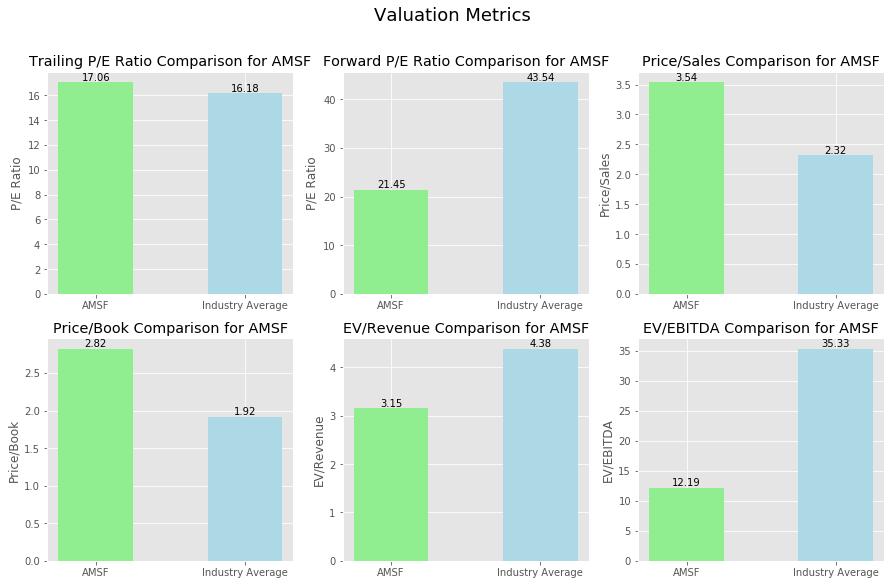

Valuation Score: 3 / 6


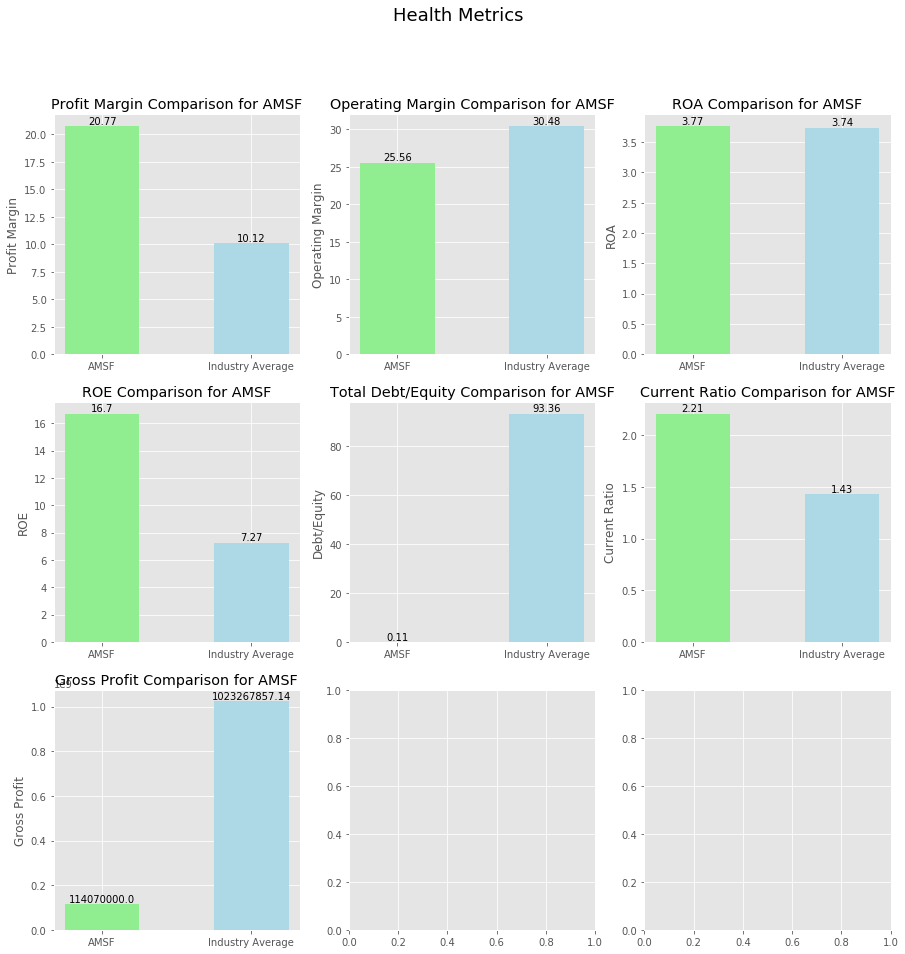

Health Score: 4 / 7
GROWTH METRICS
Quarterly Revenue Growth: -2.20%
Quarterly Earnings Growth: 8.60%
Forward Dividend & Yield: 0.015


C:\Users\kevin\Documents\Projects\Coding Projects\Stock Market\Stock-Market-Analysis\market_ml.py:235: RuntimeWarning: Model has more features than X contains. Using nan instead. Extra features: ['Industry_Oil & Gas Drilling & Exploration', 'Industry_Personal Products', 'Sector_Consumer Goods', 'Sector_Industrial Goods', 'Industry_Foreign Regional Banks', 'Industry_Long-Term Care Facilities', 'Sector_Financial', 'Industry_Oil & Gas Pipelines']
  warnings.warn('Model has more features than X contains. Using nan instead. Extra features: ' + str(extra_model_features), RuntimeWarning)
C:\Users\kevin\Documents\Projects\Coding Projects\Stock Market\Stock-Market-Analysis\market_ml.py:235: RuntimeWarning: Model has more features than X contains. Using nan instead. Extra features: ['Industry_Oil & Gas Drilling & Exploration', 'Industry_Oil & Gas Pipelines', 'Sector_Industrial Goods', 'Industry_Long-Term Care Facilities']
  warnings.warn('Model has more features than X contains. Using nan instea

Predicted price using XGBoost Regression: 73.18075. Stdev: 1.1135495


In [5]:
analyze('AMSF', industry_averages=industry_averages)

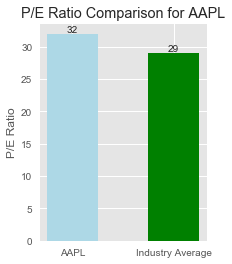

In [76]:
def plot_pe_vs_industry(ticker, pe, industry_pe):
    plt.style.use('ggplot')
    labels = [ticker, 'Industry Average']
    plt.figure(figsize=(3,4))
    ax = plt.bar([.3, .7], [pe, industry_pe], width=[.2, .2], color=['lightblue', 'green'])
    plt.title("P/E Ratio Comparison for " + ticker)
    plt.ylabel("P/E Ratio")
    plt.xticks([.3,.7], labels)
    plt.text(.3, pe, pe, verticalalignment='bottom', horizontalalignment='center')
    plt.text(.7, industry_pe, industry_pe, verticalalignment='bottom', horizontalalignment='center')
    ax.set_xticklabels=labels
    plt.show()

plot_pe_vs_industry("AAPL", 32, 29)

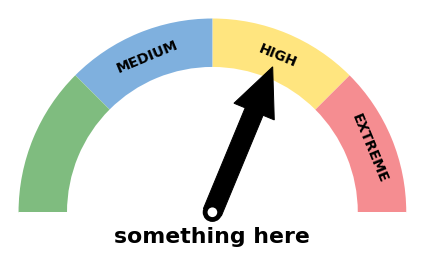

In [11]:
gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], arrow=3, title='something here')

In [2]:
compute_returns(filename='transactions_a05_b001.csv')

Starting amount: $500000
Buying 29.0 shares of AAL for $29.0, totalling $826.5. Capital is now $499173.5
Buying 16.0 shares of AAN for $16.0, totalling $901.6. Capital is now $498271.9
Buying 32.0 shares of AAOI for $32.0, totalling $368.0. Capital is now $497903.9
Buying 22.0 shares of AAON for $22.0, totalling $1093.4. Capital is now $496810.5
Buying 21.0 shares of AAWW for $21.0, totalling $565.74. Capital is now $496244.76
Buying 20.0 shares of ABB for $20.0, totalling $483.2. Capital is now $495761.56
Buying 20.0 shares of ABT for $20.0, totalling $1750.3999999999999. Capital is now $494011.16
Buying 19.0 shares of ACBI for $19.0, totalling $347.51. Capital is now $493663.64999999997
Buying 21.0 shares of ACIW for $21.0, totalling $794.22. Capital is now $492869.43
Buying 29.0 shares of ACLS for $29.0, totalling $701.22. Capital is now $492168.21
Buying 15.0 shares of ADNT for $15.0, totalling $318.75. Capital is now $491849.46
Buying 30.0 shares of ADVM for $30.0, totalling $338.

In [2]:
update_csv()

Getting data for: A
Getting data for: AA
Getting data for: AACG
Failed to obtain sector and industry for AACG
Getting data for: AAL
Getting data for: AAMC
Failed to parse json response for AAMC
Ticker: AAMC did not work.
Getting data for: AAME
Failed to parse json response for AAME
Ticker: AAME did not work.
Getting data for: AAN
Getting data for: AAOI
Getting data for: AAON
Getting data for: AAP
Getting data for: AAPL
Getting data for: AAT
Getting data for: AAU
Failed to parse json response for AAU
Ticker: AAU did not work.
Getting data for: AAWW
Getting data for: AAXN
Failed to obtain sector and industry for AAXN
Getting data for: AB
Getting data for: ABB
Getting data for: ABBV
Getting data for: ABC
Getting data for: ABCB
Getting data for: ABDC
Failed to obtain sector and industry for ABDC
Getting data for: ABEO
Failed to obtain sector and industry for ABEO
Getting data for: ABEOW
Failed to obtain sector and industry for ABEOW
Failed to parse json response for ABEOW
Ticker: ABEOW did

In [3]:
df = pd.read_csv('csv_files/company_statistics.csv', encoding='cp1252')

In [4]:
df.head()

Ticker              Sector                       Industry    Price  \
0      A          Healthcare         Diagnostics & Research  85.3400   
1     AA     Basic Materials                       Aluminum  21.7000   
2   AACG  Consumer Defensive  Education & Training Services   1.4002   
3    AAL         Industrials                       Airlines  28.5000   
4    AAN         Industrials      Rental & Leasing Services  56.3500   

   Market Cap (intraday)  Trailing P/E  Forward P/E  \
0           2.600000e+10         25.15        22.30   
1           4.000000e+09           NaN        28.67   
2           3.300000e+07           NaN          NaN   
3           1.200000e+10          8.00         5.29   
4           3.800000e+09         19.19        12.47   

   PEG Ratio (5 yr expected)  Price/Sales  Price/Book  ...  Beta (3Y Monthly)  \
0                       2.73         5.09        5.52  ...                NaN   
1                       1.62         0.35        0.88  ...                NaN   
2                        NaN          NaN         NaN  ...                NaN   
3                       0.61         0.27       77.47  ...                NaN   
4                       0.82         0.95        2.01  ...                NaN   

   Shares Outstanding  Forward Annual Dividend Rate  \
0         309000000.0                          0.72   
1         185570000.0                           NaN   
2          23800000.0                           NaN   
3         438060000.0                          0.40   
4          67150000.0                          0.16   

   Forward Annual Dividend Yield  Trailing Annual Dividend Rate  \
0                           0.84                           0.66   
1                            NaN                           0.36   
2                            NaN                            NaN   
3                           1.41                           0.40   
4                           0.28                           0.14   

   Trailing Annual Dividend Yield  5 Year Average Dividend Yield  \
0                            0.77                           0.94   
1                            1.67                            NaN   
2                             NaN                            NaN   
3                            1.41                           0.99   
4                            0.25                           0.29   

   Payout Ratio  Net Income Avi to Common  Enterprise Value  
0         19.47              1.070000e+09      2.752000e+10  
1          0.00             -7.940000e+08      7.050000e+09  
2          0.00                       NaN      3.486000e+07  
3         11.30              1.600000e+09      4.173000e+10  
4          4.81              2.002700e+08      4.350000e+09  

[5 rows x 42 columns]

In [5]:
df.corr()

Price  Market Cap (intraday)  Trailing P/E  \
Price                           1.000000               0.294579     -0.006413   
Market Cap (intraday)           0.294579               1.000000     -0.010471   
Trailing P/E                   -0.006413              -0.010471      1.000000   
Forward P/E                     0.015509               0.010356     -0.025532   
PEG Ratio (5 yr expected)      -0.016156              -0.002898     -0.033004   
Price/Sales                    -0.014559              -0.008498      0.028273   
Price/Book                      0.133739               0.039158      0.005066   
Enterprise Value/Revenue       -0.007525              -0.006135      0.029065   
Enterprise Value/EBITDA         0.009533               0.003804      0.020951   
Profit Margin                   0.141966               0.078135     -0.026548   
Operating Margin                0.021683               0.009467     -0.001107   
Return on Assets                0.066923               0.031102     -0.005021   
Return on Equity                0.109549               0.085731     -0.007330   
Revenue                         0.197160               0.600692     -0.013487   
Revenue Per Share               0.278700               0.056439     -0.020238   
Quarterly Revenue Growth       -0.012836              -0.007390     -0.001402   
Gross Profit                   -0.007329               0.025714     -0.004707   
EBITDA                          0.221227               0.853081     -0.018417   
Diluted EPS                     0.256339               0.101423     -0.026953   
EPS Beat Ratio                 -0.054400              -0.006798      0.032583   
Quarterly Earnings Growth      -0.017922              -0.002842      0.000432   
Total Cash                      0.054145               0.301427     -0.006614   
Total Cash Per Share            0.044298               0.030315     -0.007682   
Total Debt                      0.093119               0.410440     -0.008329   
Total Debt/Equity              -0.015806              -0.005840     -0.006424   
Current Ratio                  -0.011113              -0.001893     -0.002286   
Book Value Per Share            0.410341               0.097981     -0.015254   
Operating Cash Flow             0.178453               0.642643     -0.010984   
Levered Free Cash Flow          0.201915               0.780794     -0.013788   
Beta (3Y Monthly)                    NaN                    NaN           NaN   
Shares Outstanding              0.013369               0.471282     -0.012920   
Forward Annual Dividend Rate    0.625922               0.240179     -0.011778   
Forward Annual Dividend Yield  -0.190483              -0.054164      0.000708   
Trailing Annual Dividend Rate   0.256480               0.100184     -0.008288   
Trailing Annual Dividend Yield -0.022095              -0.008161      0.002098   
5 Year Average Dividend Yield  -0.337991              -0.085814      0.034782   
Payout Ratio                   -0.008142               0.006142      0.219480   
Net Income Avi to Common        0.223848               0.881455     -0.020887   
Enterprise Value               -0.003554               0.035420     -0.002010   

                                Forward P/E  PEG Ratio (5 yr expected)  \
Price                              0.015509                  -0.016156   
Market Cap (intraday)              0.010356                  -0.002898   
Trailing P/E                      -0.025532                  -0.033004   
Forward P/E                        1.000000                   0.001665   
PEG Ratio (5 yr expected)          0.001665                   1.000000   
Price/Sales                       -0.008083                  -0.000805   
Price/Book                        -0.003694                  -0.015008   
Enterprise Value/Revenue          -0.007054                  -0.000909   
Enterprise Value/EBITDA           -0.000018                  -0.004280   
Profit Margin                      0.039372           

In [11]:
import matplotlib.pyplot as plt
import hvplot.pandas
df.hvplot(x='Market Cap (intraday)', y='Price', kind='scatter')

:Scatter   [Market Cap (intraday)]   (Price)

In [29]:
df['log(Market Cap)'] = np.log(df['Market Cap (intraday)'])
df['log(Price)'] = np.log(df['Price'])
df_no_na = df[np.isfinite(df['log(Market Cap)']) & np.isfinite(df['log(Price)'])]
df_no_na.hvplot(x='log(Market Cap)', y='log(Price)', kind='scatter')

C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


:Scatter   [log(Market Cap)]   (log(Price))

In [30]:
import statsmodels.api as sm
X = sm.add_constant(df_no_na[['log(Market Cap)']])
y = df_no_na['log(Price)']
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log(Price)   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     7736.
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:11:48   Log-Likelihood:                -5857.6
No. Observations:                4439   AIC:                         1.172e+04
Df Residuals:                    4437   BIC:                         1.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.0909      0.125    -

C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
df['log(Book Value Per Share)'] = np.log(df['Book Value Per Share'])
df.hvplot(x='log(Book Value Per Share)', y='log(Price)', kind='scatter')

C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\holoviews\core\util.py:992: RuntimeWarning: invalid value encountered in double_scalars
  lpad = span*(padding[0])
C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\holoviews\core\util.py:993: RuntimeWarning: invalid value encountered in double_scalars
  upad = span*(padding[1])
C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\holoviews\core\util.py:992: RuntimeWarning: invalid value encountered in double_scalars
  lpad = span*(padding[0])
C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\holoviews\core\uti

:Scatter   [log(Book Value Per Share)]   (log(Price))

In [43]:
df_no_na = df[np.isfinite(df['log(Book Value Per Share)'])]
X = sm.add_constant(df_no_na[['log(Book Value Per Share)']])
y = df_no_na['log(Price)']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log(Price)   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     4447.
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:17:05   Log-Likelihood:                -5835.2
No. Observations:                4069   AIC:                         1.167e+04
Df Residuals:                    4067   BIC:                         1.169e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [37]:
df['log(Levered Free Cash Flow)'] = np.log(df['Levered Free Cash Flow'])
df.hvplot(x='log(Levered Free Cash Flow)', y='log(Price)', kind='scatter')

:Scatter   [log(Levered Free Cash Flow)]   (log(Price))

In [44]:
df_no_na = df[np.isfinite(df['log(Levered Free Cash Flow)'])]
X = sm.add_constant(df_no_na[['log(Levered Free Cash Flow)']])
y = df_no_na['log(Price)']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log(Price)   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     947.5
Date:                Mon, 30 Dec 2019   Prob (F-statistic):          9.82e-173
Time:                        16:17:13   Log-Likelihood:                -3341.1
No. Observations:                2155   AIC:                             6686.
Df Residuals:                    2153   BIC:                             6698.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [45]:
X = sm.add_constant(df_no_na[['log(Levered Free Cash Flow)', 'log(Book Value Per Share)']])
y = df_no_na['log(Price)']
model = sm.OLS(y, X).fit()
print(model.summary())

MissingDataError: exog contains inf or nans

In [79]:
df['log(Forward Annual Dividend Rate)'] = np.log(df['Forward Annual Dividend Rate'])
df.hvplot(x='log(Forward Annual Dividend Rate)', y='log(Price)', kind='scatter')

:Scatter   [log(Forward Annual Dividend Rate)]   (log(Price))

In [37]:
df_no_na = df.dropna()
X = sm.add_constant(df_no_na[['log(Forward Annual Dividend Rate)']])
y = df_no_na['log(Price)']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log(Price)   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     77.34
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           2.02e-13
Time:                        20:39:31   Log-Likelihood:                -84.793
No. Observations:                  83   AIC:                             173.6
Df Residuals:                      81   BIC:                             178.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
df_no_na = df.dropna()
X = sm.add_constant(df_no_na[['log(Levered Free Cash Flow(TTM))', 'log(Book Value Per Share)', 'log(Forward Annual Dividend Rate)']])
y = df_no_na['log(Price)']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log(Price)   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     39.14
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           1.32e-15
Time:                        20:40:19   Log-Likelihood:                -74.814
No. Observations:                  83   AIC:                             157.6
Df Residuals:                      79   BIC:                             167.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [80]:
df['log(Diluted EPS(TTM))'] = np.log(df['Diluted EPS(TTM)'])
df.hvplot(x='log(Diluted EPS(TTM))', y='log(Price)', kind='scatter')

C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\holoviews\core\util.py:992: RuntimeWarning: invalid value encountered in double_scalars
  lpad = span*(padding[0])
C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\holoviews\core\util.py:993: RuntimeWarning: invalid value encountered in double_scalars
  upad = span*(padding[1])
C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\holoviews\core\util.py:992: RuntimeWarning: invalid value encountered in double_scalars
  lpad = span*(padding[0])
C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\holoviews\core\uti

:Scatter   [log(Diluted EPS(TTM))]   (log(Price))

In [81]:
df_no_na = df.dropna()
X = sm.add_constant(df_no_na[['log(Diluted EPS(TTM))']])
y = df_no_na['log(Price)']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log(Price)   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     93.04
Date:                Wed, 13 Nov 2019   Prob (F-statistic):           4.22e-15
Time:                        21:03:18   Log-Likelihood:                -76.815
No. Observations:                  83   AIC:                             157.6
Df Residuals:                      81   BIC:                             162.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.47

C:\Users\kevin\Anaconda3\envs\tensorflow_env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1]:
df_no_na = df.dropna(subset=['log(Levered Free Cash Flow(TTM))', 'log(Book Value Per Share)', 'log(Forward Annual Dividend Rate)', 
                              'log(Diluted EPS(TTM))', 'log(Price)'])
X = sm.add_constant(df_no_na[['log(Levered Free Cash Flow(TTM))', 'log(Book Value Per Share)', 'log(Forward Annual Dividend Rate)', 
                              'log(Diluted EPS(TTM))']])
# print([i for i in y if i == float('nan')])
y = df_no_na['log(Price)']
model = sm.OLS(y, X).fit()
print(model.summary())

NameError: name 'df' is not defined

In [57]:
x = [1, np.log(str_to_num('6.08B')), np.log(10.83), np.log(1.64), np.log(3.46)]
print(x)
predicted_price = model.predict(x)

[1, 22.528270532924488, 2.382320061012899, 0.494696241836107, 1.2412685890696329]


In [59]:
np.e**predicted_price[0]

88.91771198475706

In [63]:
for index, row in df_no_na.iterrows():
    actual_price = row['Price']
    x = [1, row['log(Levered Free Cash Flow(TTM))'], 
         row['log(Book Value Per Share)'],
        row['log(Forward Annual Dividend Rate)'],
        row['log(Diluted EPS(TTM))']]
    predicted_price = np.e**model.predict(x)[0]
    ticker = row['Ticker']
    print(ticker + '. Actual Price: ' + str(actual_price) + '. Predicted Price: ' + str(round(predicted_price, 2)))
    

ARLP. Actual Price: 11.58. Predicted Price: 71.88
AMGN. Actual Price: 220.24. Predicted Price: 258.77
AAPL. Actual Price: 258.3. Predicted Price: 240.49
AMAT. Actual Price: 55.77. Predicted Price: 60.82
BBSI. Actual Price: 91.66. Predicted Price: 90.65
BBGI. Actual Price: 2.82. Predicted Price: 13.28
BGFV. Actual Price: 3.2. Predicted Price: 8.86
BLKB. Actual Price: 80.29. Predicted Price: 18.79
AVGO. Actual Price: 311.2. Predicted Price: 360.91
BRKS. Actual Price: 46.19. Predicted Price: 63.05
CHRW. Actual Price: 77.53. Predicted Price: 96.52
CASY. Actual Price: 166.88. Predicted Price: 114.43
CDW. Actual Price: 132.98. Predicted Price: 72.76
PLCE. Actual Price: 81.64. Predicted Price: 76.19
CTAS. Actual Price: 259.95. Predicted Price: 169.84
CSCO. Actual Price: 48.01. Predicted Price: 71.94
COLM. Actual Price: 93.39. Predicted Price: 79.4
CMCO. Actual Price: 38.99. Predicted Price: 37.58
CPSI. Actual Price: 26.71. Predicted Price: 27.89
CNMD. Actual Price: 109.86. Predicted Price: 42

In [65]:
get_summary_statistics('TSLA')

{'Market Cap (intraday)': '63.07B',
 'Enterprise Value': '72.94B',
 'Trailing P/E': 'N/A',
 'Forward P/E': '64.92',
 'PEG Ratio (5 yr expected)': '-4.71',
 'Price/Sales': '2.58',
 'Price/Book': '10.43',
 'Enterprise Value/Revenue': '2.99',
 'Enterprise Value/EBITDA': '33.48',
 'Beta (3Y Monthly)': '0.59',
 '52-Week Change': '0.32%',
 'S&P500 52-Week Change': '14.27%',
 '52 Week High': '379.49',
 '52 Week Low': '176.99',
 '50-Day Moving Average': '276.28',
 '200-Day Moving Average': '240.19',
 'Avg Vol (3 month)': '8M',
 'Avg Vol (10 day)': '8.79M',
 'Shares Outstanding': '180.24M',
 'Float': '142.11M',
 '% Held by Insiders': '24.98%',
 '% Held by Institutions': '62.93%',
 'Shares Short (Oct 31, 2019)': '31.78M',
 'Short Ratio (Oct 31, 2019)': '3.16',
 'Short % of Float (Oct 31, 2019)': '23.57%',
 'Short % of Shares Outstanding (Oct 31, 2019)': '17.63%',
 'Shares Short (prior month Sep 30, 2019)': '36.06M',
 'Forward Annual Dividend Rate': 'N/A',
 'Forward Annual Dividend Yield': 'N/A',

In [66]:
master_list = ['Market Cap (intraday)',
 'Enterprise Value',
 'Trailing P/E',
 'Forward P/E',
 'PEG Ratio (5 yr expected)',
 'Price/Sales',
 'Price/Book',
 'Enterprise Value/Revenue',
 'Enterprise Value/EBITDA',
 'Beta (3Y Monthly)',
 '52-Week Change',
 'S&P500 52-Week Change',
 '52 Week High',
 '52 Week Low',
 '50-Day Moving Average',
 '200-Day Moving Average',
 'Avg Vol (3 month)',
 'Avg Vol (10 day)',
 'Shares Outstanding',
 'Float',
 '% Held by Insiders',
 '% Held by Institutions',
 'Shares Short (Oct 31, 2019)',
 'Short Ratio (Oct 31, 2019)',
 'Short % of Float (Oct 31, 2019)',
 'Short % of Shares Outstanding (Oct 31, 2019)',
 'Shares Short (prior month Sep 30, 2019)',
 'Forward Annual Dividend Rate',
 'Forward Annual Dividend Yield',
 'Trailing Annual Dividend Rate',
 'Trailing Annual Dividend Yield',
 '5 Year Average Dividend Yield',
 'Payout Ratio',
 'Dividend Date',
 'Ex-Dividend Date',
 'Last Split Factor (new per old)',
 'Last Split Date',
 'Fiscal Year Ends',
 'Most Recent Quarter',
 'Profit Margin',
 'Operating Margin',
 'Return on Assets',
 'Return on Equity',
 'Revenue',
 'Revenue Per Share',
 'Quarterly Revenue Growth',
 'Gross Profit',
 'EBITDA',
 'Net Income Avi to Common',
 'Diluted EPS',
 'Quarterly Earnings Growth',
 'Total Cash',
 'Total Cash Per Share',
 'Total Debt',
 'Total Debt/Equity',
 'Current Ratio',
 'Book Value Per Share',
 'Operating Cash Flow',
 'Levered Free Cash Flow']

In [67]:
x = [1, np.log(str_to_num('83.7M')), np.log(7.25), np.log(.42), np.log(1.34)]
predicted_price = model.predict(x)
np.e**predicted_price[0]

[1, 18.242749535459705, 1.9810014688665833, -0.8675005677047231, 0.29266961396282004]


26.671233206184148

In [10]:
tickers = set(get_tickers())
print(len(tickers))
import pandas_datareader
nasdaq_tickers = list(pandas_datareader.nasdaq_trader.get_nasdaq_symbols(retry_count=3, timeout=30, pause=None).index)
print(len(nasdaq_tickers))
combined = list(tickers.union(nasdaq_tickers))
print(len(combined))

2114
8915
8977


In [1]:
from market_tests import *
test_market_suite()

Tests for market.py PASSED!


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.